In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from env import get_db_url
from sklearn.model_selection import train_test_split
from acquire import get_superstore_df
from acquire import clean_superstore_df

In [2]:
def acquire_superstore():
    
    #assign the file name
    filename = 'superstore.csv'
    #check if the file exists in the current directory and read it if it is
    if os.path.exists(filename):
        print('Reading from csv file...')
        #read the local .csv into the notebook
        df = pd.read_csv(filename)
        return df
    #assign the sql query to a variable for use in pulling a new copy of the dataset from the database
    query = '''
    SELECT * FROM orders
    JOIN categories USING(`Category ID`)
    JOIN customers USING(`Customer ID`)
    JOIN products USING(`Product ID`)
    JOIN regions USING(`Region ID`);
    '''
    #if needed pull a fresh copy of the dataset from the database
    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql(query, get_db_url('superstore_db'))
    #save a copy of the dataset to the local directory as a .csv file
    df.to_csv(filename, index=False)
    return df

In [3]:
df = acquire_superstore()

Reading from csv file...


In [4]:
df.head()

,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South
2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,...,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South


In [6]:
df.shape

(1734, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region ID      1734 non-null   int64  
 1   Product ID     1734 non-null   object 
 2   Customer ID    1734 non-null   object 
 3   Category ID    1734 non-null   int64  
 4   Order ID       1734 non-null   object 
 5   Order Date     1734 non-null   object 
 6   Ship Date      1734 non-null   object 
 7   Ship Mode      1734 non-null   object 
 8   Segment        1734 non-null   object 
 9   Country        1734 non-null   object 
 10  City           1734 non-null   object 
 11  State          1734 non-null   object 
 12  Postal Code    1734 non-null   float64
 13  Sales          1734 non-null   float64
 14  Quantity       1734 non-null   float64
 15  Discount       1734 non-null   float64
 16  Profit         1734 non-null   float64
 17  Category       1734 non-null   object 
 18  Sub-Cate

In [8]:
df.describe()

,Region ID,Category ID,Postal Code,Sales,Quantity,Discount,Profit
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,2.722607,8.106113,53501.926182,229.206358,3.794694,0.160110,21.880351
std,1.062277,3.480593,32180.245224,532.862614,2.297407,0.206419,202.891949
min,1.000000,1.000000,1841.000000,1.080000,1.000000,0.000000,-3839.990400
25%,2.000000,6.000000,19143.000000,16.695000,2.000000,0.000000,1.702400
50%,3.000000,8.000000,50315.000000,52.245000,3.000000,0.200000,8.073050
75%,4.000000,11.000000,85705.000000,209.917500,5.000000,0.200000,27.414450
max,4.000000,17.000000,98661.000000,8159.952000,14.000000,0.800000,3177.475000


In [9]:
cat_sales = df[['Order Date', 'Sales', 'Category']]
cat_sales.head()

,Order Date,Sales,Category
0,2016-11-08,261.9600,Furniture
1,2016-11-08,731.9400,Furniture
2,2015-10-11,957.5775,Furniture
3,2015-10-11,22.3680,Office Supplies
4,2017-04-15,15.5520,Office Supplies


In [10]:
cat_sales['Category'].value_counts()

Office Supplies    1055
Furniture           360
Technology          319
Name: Category, dtype: int64

In [11]:
os = cat_sales[cat_sales['Category'] == 'Office Supplies']

In [12]:
os.head()

,Order Date,Sales,Category
3,2015-10-11,22.368,Office Supplies
4,2017-04-15,15.552,Office Supplies
5,2017-09-19,95.616,Office Supplies
6,2016-06-04,75.880,Office Supplies
9,2015-04-26,72.784,Office Supplies


In [13]:
os['Category'].value_counts()

Office Supplies    1055
Name: Category, dtype: int64

In [14]:
furn = cat_sales[cat_sales['Category'] == 'Furniture']
furn.head()


,Order Date,Sales,Category
0,2016-11-08,261.9600,Furniture
1,2016-11-08,731.9400,Furniture
2,2015-10-11,957.5775,Furniture
7,2015-04-26,831.9360,Furniture
8,2015-04-26,97.0400,Furniture


In [15]:
furn['Category'].value_counts()

Furniture    360
Name: Category, dtype: int64

In [16]:
tech = cat_sales[cat_sales['Category'] == 'Technology']
tech.head()


,Order Date,Sales,Category
14,2017-11-23,74.112,Technology
15,2017-11-23,27.992,Technology
18,2014-11-19,503.960,Technology
19,2014-11-19,149.950,Technology
20,2014-11-19,29.000,Technology


In [17]:
tech['Category'].value_counts()

Technology    319
Name: Category, dtype: int64

In [18]:
df['Order Date'].min()

'2014-01-04'

In [19]:
df['Order Date'].max()

'2017-12-30'

In [20]:
os['Order Date'] = pd.to_datetime(os['Order Date'])

/var/folders/n7/fjb2f8gd5jg17xlxz1c85vhc0000gn/T/ipykernel_50888/1133627327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os['Order Date'] = pd.to_datetime(os['Order Date'])


In [21]:
os.head()

,Order Date,Sales,Category
3,2015-10-11,22.368,Office Supplies
4,2017-04-15,15.552,Office Supplies
5,2017-09-19,95.616,Office Supplies
6,2016-06-04,75.880,Office Supplies
9,2015-04-26,72.784,Office Supplies


In [22]:
os.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 3 to 1732
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  1055 non-null   datetime64[ns]
 1   Sales       1055 non-null   float64       
 2   Category    1055 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.0+ KB


In [23]:
os = os.set_index(os['Order Date'])

In [24]:
os.head()

,Order Date,Sales,Category
Order Date,,,
2015-10-11,2015-10-11,22.368,Office Supplies
2017-04-15,2017-04-15,15.552,Office Supplies
2017-09-19,2017-09-19,95.616,Office Supplies
2016-06-04,2016-06-04,75.880,Office Supplies
2015-04-26,2015-04-26,72.784,Office Supplies


<AxesSubplot:xlabel='Order Date'>

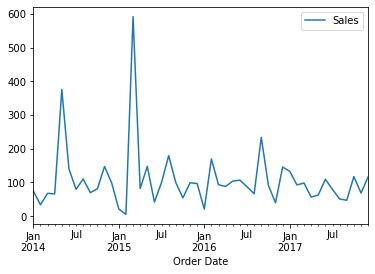

In [27]:
os.resample('M').mean().plot()

<AxesSubplot:xlabel='Order Date'>

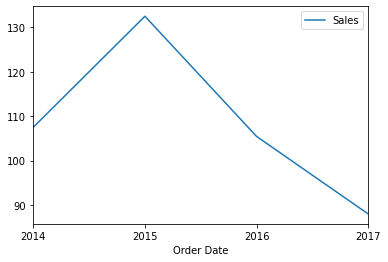

In [32]:
os.resample('Y').mean().plot()

In [29]:
furn['Order Date'] = pd.to_datetime(furn['Order Date'])
furn = furn.set_index(furn['Order Date'])

/var/folders/n7/fjb2f8gd5jg17xlxz1c85vhc0000gn/T/ipykernel_50888/129819800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furn['Order Date'] = pd.to_datetime(furn['Order Date'])


In [30]:
furn.head()

,Order Date,Sales,Category
Order Date,,,
2016-11-08,2016-11-08,261.9600,Furniture
2016-11-08,2016-11-08,731.9400,Furniture
2015-10-11,2015-10-11,957.5775,Furniture
2015-04-26,2015-04-26,831.9360,Furniture
2015-04-26,2015-04-26,97.0400,Furniture


<AxesSubplot:xlabel='Order Date'>

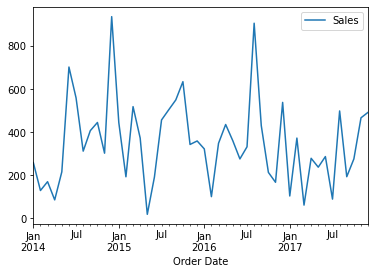

In [31]:
furn.resample('M').mean().plot()

<AxesSubplot:xlabel='Order Date'>

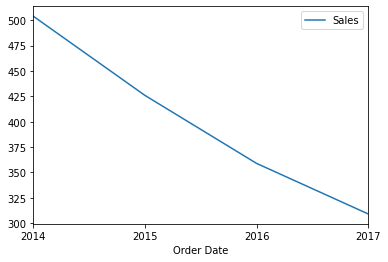

In [33]:
furn.resample('Y').mean().plot()

In [34]:
tech['Order Date'] = pd.to_datetime(tech['Order Date'])
tech = tech.set_index(tech['Order Date'])

/var/folders/n7/fjb2f8gd5jg17xlxz1c85vhc0000gn/T/ipykernel_50888/55725010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech['Order Date'] = pd.to_datetime(tech['Order Date'])


In [35]:
tech.head()

,Order Date,Sales,Category
Order Date,,,
2017-11-23,2017-11-23,74.112,Technology
2017-11-23,2017-11-23,27.992,Technology
2014-11-19,2014-11-19,503.960,Technology
2014-11-19,2014-11-19,149.950,Technology
2014-11-19,2014-11-19,29.000,Technology


<AxesSubplot:xlabel='Order Date'>

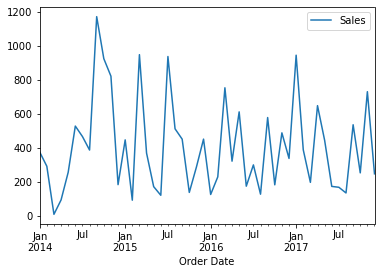

In [36]:
tech.resample('M').mean().plot()

<AxesSubplot:xlabel='Order Date'>

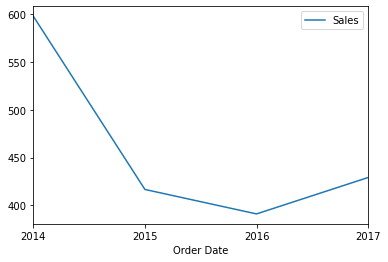

In [37]:
tech.resample('Y').mean().plot()

In [5]:
west = df[df['Region Name'] == 'West']
west.head()

,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
248,2,OFF-LA-10000240,DV-13045,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Corporate,United States,...,90036.0,14.620,2.0,0.0,6.8714,Office Supplies,Labels,Darrin Van Huff,Self-Adhesive Address Labels for Typewriters b...,West
249,2,FUR-FU-10001487,BH-11710,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,Consumer,United States,...,90032.0,48.860,7.0,0.0,14.1694,Furniture,Furnishings,Brosina Hoffman,Eldon Expressions Wood and Plastic Desk Access...,West
250,2,OFF-AR-10002833,BH-11710,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,Consumer,United States,...,90032.0,7.280,4.0,0.0,1.9656,Office Supplies,Art,Brosina Hoffman,Newell 322,West
251,2,TEC-PH-10002275,BH-11710,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,Consumer,United States,...,90032.0,907.152,6.0,0.2,90.7152,Technology,Phones,Brosina Hoffman,Mitel 5320 IP Phone VoIP phone,West
252,2,OFF-BI-10003910,BH-11710,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,Consumer,United States,...,90032.0,18.504,3.0,0.2,5.7825,Office Supplies,Binders,Brosina Hoffman,DXL Angle-View Binders with Locking Rings by S...,West


In [6]:
east = df[df['Region Name'] == 'East']
east.head()

,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
1178,4,FUR-CH-10002774,SF-20065,2,US-2017-156909,2017-07-16,2017-07-18,Second Class,Consumer,United States,...,19140.0,71.372,2.0,0.3,-1.0196,Furniture,Chairs,Sandra Flanagan,"Global Deluxe Stacking Chair, Gray",East
1179,4,FUR-BO-10004834,TB-21520,1,US-2015-150630,2015-09-17,2015-09-21,Standard Class,Consumer,United States,...,19140.0,3083.430,7.0,0.5,-1665.0522,Furniture,Bookcases,Tracy Blumstein,"Riverside Palais Royal Lawyers Bookcase, Royal...",East
1180,4,OFF-BI-10000474,TB-21520,9,US-2015-150630,2015-09-17,2015-09-21,Standard Class,Consumer,United States,...,19140.0,9.618,2.0,0.7,-7.0532,Office Supplies,Binders,Tracy Blumstein,Avery Recycled Flexi-View Covers for Binding S...,East
1181,4,FUR-FU-10004848,TB-21520,6,US-2015-150630,2015-09-17,2015-09-21,Standard Class,Consumer,United States,...,19140.0,124.200,3.0,0.2,15.5250,Furniture,Furnishings,Tracy Blumstein,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",East
1182,4,OFF-EN-10001509,TB-21520,13,US-2015-150630,2015-09-17,2015-09-21,Standard Class,Consumer,United States,...,19140.0,3.264,2.0,0.2,1.1016,Office Supplies,Envelopes,Tracy Blumstein,Poly String Tie Envelopes,East


In [9]:
central = df[df['Region Name'] == 'Central']
central.head()

,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
789,3,OFF-AP-10002311,HP-14815,10,US-2015-118983,2015-11-22,2015-11-26,Standard Class,Home Office,United States,...,76106.0,68.810,5.0,0.8,-123.8580,Office Supplies,Appliances,Harold Pawlan,Holmes Replacement Filter for HEPA Air Cleaner...,Central
790,3,OFF-BI-10000756,HP-14815,9,US-2015-118983,2015-11-22,2015-11-26,Standard Class,Home Office,United States,...,76106.0,2.544,3.0,0.8,-3.8160,Office Supplies,Binders,Harold Pawlan,Storex DuraTech Recycled Plastic Frosted Binders,Central
791,3,OFF-ST-10004186,PK-19075,5,CA-2014-105893,2014-11-11,2014-11-18,Standard Class,Consumer,United States,...,53711.0,665.880,6.0,0.0,13.3176,Office Supplies,Storage,Pete Kriz,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",Central
792,3,OFF-AR-10000246,KB-16585,7,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,Corporate,United States,...,68025.0,19.460,7.0,0.0,5.0596,Office Supplies,Art,Ken Black,Newell 318,Central
793,3,OFF-AP-10001492,KB-16585,10,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,Corporate,United States,...,68025.0,60.340,7.0,0.0,15.6884,Office Supplies,Appliances,Ken Black,"Acco Six-Outlet Power Strip, 4' Cord Length",Central


In [8]:
df['Region Name'].value_counts()

East       556
West       541
Central    389
South      248
Name: Region Name, dtype: int64

In [10]:
south = df[df['Region Name'] == 'South']
south.head()

,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South
2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,...,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South


In [11]:
south['Segment'].value_counts()

Consumer       130
Corporate       72
Home Office     46
Name: Segment, dtype: int64

In [12]:
central['Segment'].value_counts()

Consumer       213
Corporate      108
Home Office     68
Name: Segment, dtype: int64

In [15]:
south['Customer Name'].nunique()

114

In [18]:
south_cust_group = south.groupby(df['Customer Name']).df['Sales'].sum()

AttributeError: 'DataFrameGroupBy' object has no attribute 'df'

In [17]:
south_cust_group.head()

,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,...,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,...,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South
2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,...,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,...,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,OFF-LA-10003930,SW-20455,3,CA-2015-150560,2015-12-11,2015-12-12,First Class,Consumer,United States,...,23434.0,196.6200,2.0,0.00,96.3438,Office Supplies,Labels,Shaun Weien,"Dot Matrix Printer Tape Reel Labels, White, 50...",South
244,1,TEC-AC-10003063,CA-12265,12,CA-2016-106894,2016-02-07,2016-02-07,Same Day,Consumer,United States,...,22153.0,100.0000,4.0,0.00,21.0000,Technology,Accessories,Christina Anderson,Micro Innovations USB RF Wireless Keyboard wit...,South
245,1,OFF-LA-10001045,CA-12265,3,CA-2016-106894,2016-02-07,2016-02-07,Same Day,Consumer,United States,...,22153.0,7.8300,3.0,0.00,3.6018,Office Supplies,Labels,Christina Anderson,Permanent Self-Adhesive File Folder Labels for...,South
246,1,OFF-PA-10001457,KD-16495,11,CA-2014-125136,2014-09-28,2014-10-03,Standard Class,Corporate,United States,...,28314.0,96.2560,8.0,0.20,31.2832,Office Supplies,Paper,Keith Dawkins,White GlueTop Scratch Pads,South


# Restart with functions from acquire.py

In [2]:
df = get_superstore_df()
df = clean_superstore_df(df)
df.head()

Reading from CSV file...


,Unnamed: 0,product_id,customer_id,order_id,order_date,ship_date,ship_mode,segment,country,city,...,sales,quantity,discount,profit,category,sub_cat,cust_name,prod_name,region,ship_time
order_date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,0,FUR-BO-10001798,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,...,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South,3 days
2016-11-08,1,FUR-CH-10000454,CG-12520,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,...,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",South,3 days
2015-10-11,2,FUR-TA-10000577,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,...,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South,7 days
2015-10-11,3,OFF-ST-10000760,SO-20335,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,...,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South,7 days
2017-04-15,4,OFF-PA-10002365,AA-10480,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,Concord,...,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South,5 days


In [3]:
df.shape

(1734, 22)